🔹 Loading dataset...

🔹 First 5 rows of the dataset:
   holiday    temp  rain_1h  snow_1h  Year  Month  Day  Hour  weather_main  \
0        7  288.28      0.0      0.0  2012     10    2     9             1   
1        7  289.36      0.0      0.0  2012     10    2    10             1   
2        7  289.58      0.0      0.0  2012     10    2    11             1   
3        7  290.13      0.0      0.0  2012     10    2    12             1   
4        7  291.14      0.0      0.0  2012     10    2    13             1   

   weather_description  traffic_volume  
0                   24            5545  
1                    2            4516  
2                   19            4767  
3                   19            5026  
4                    2            4918  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   h

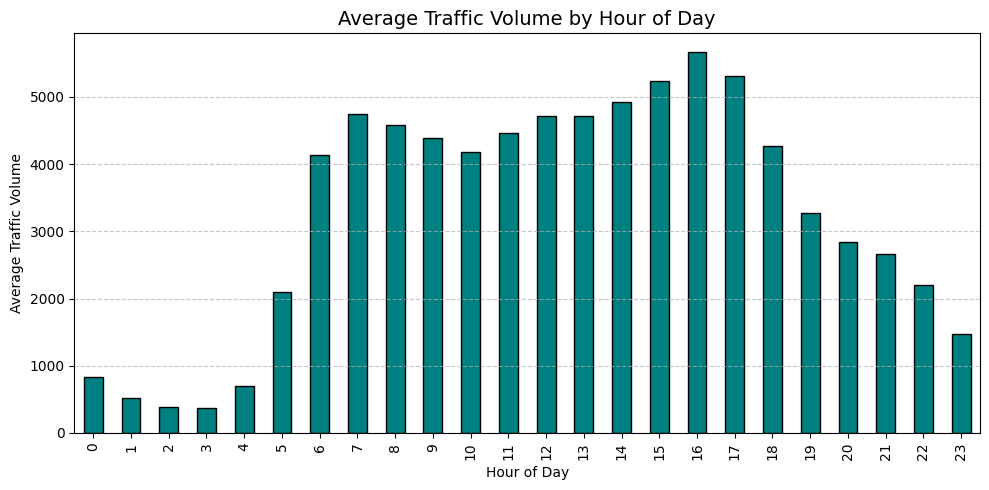


🔹 Analyzing traffic patterns by weekday...


/tmp/ipython-input-3746378870.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


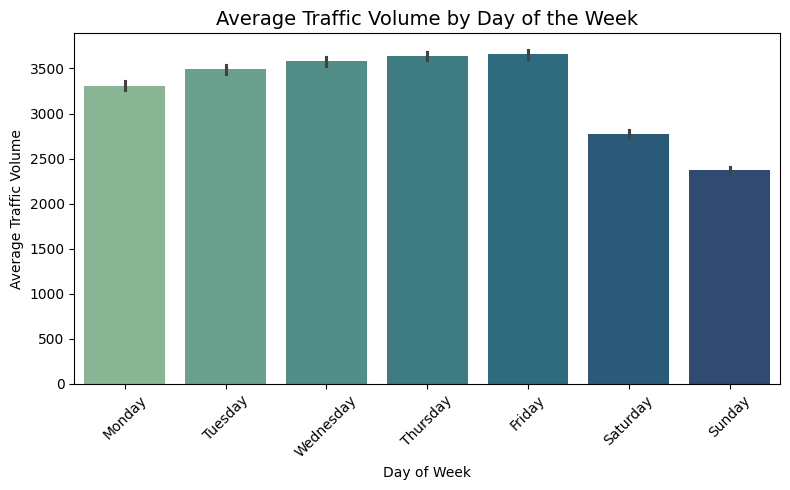


🔹 Analyzing traffic volume under different weather conditions...


/tmp/ipython-input-3746378870.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='pastel')


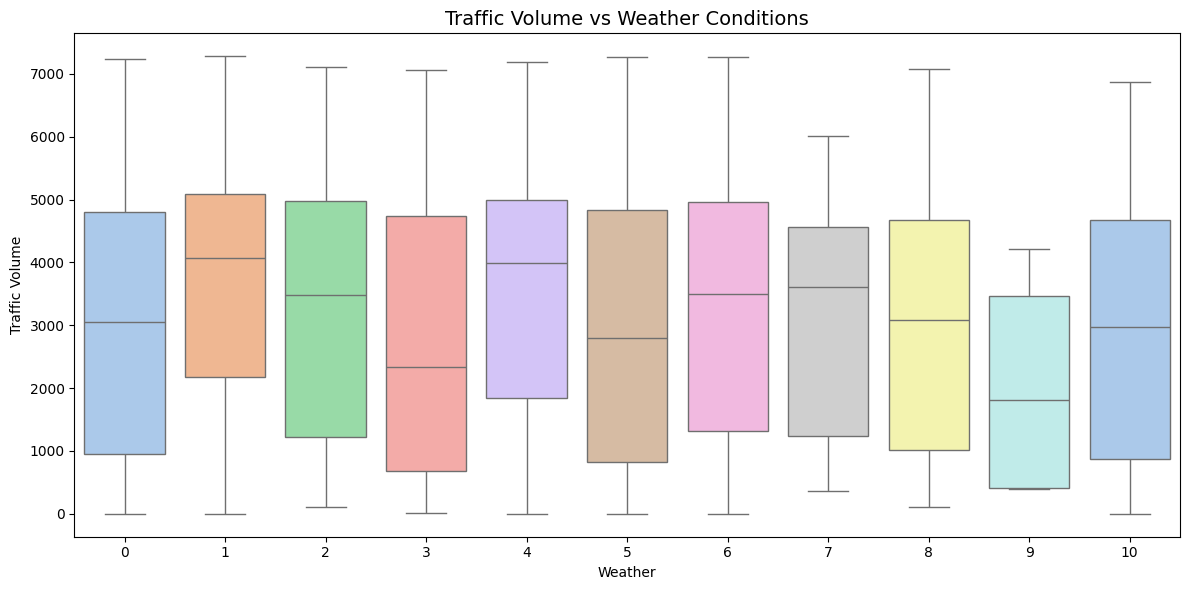


🔹 Analyzing monthly traffic trends...


/tmp/ipython-input-3746378870.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='traffic_volume', data=df, estimator='mean',


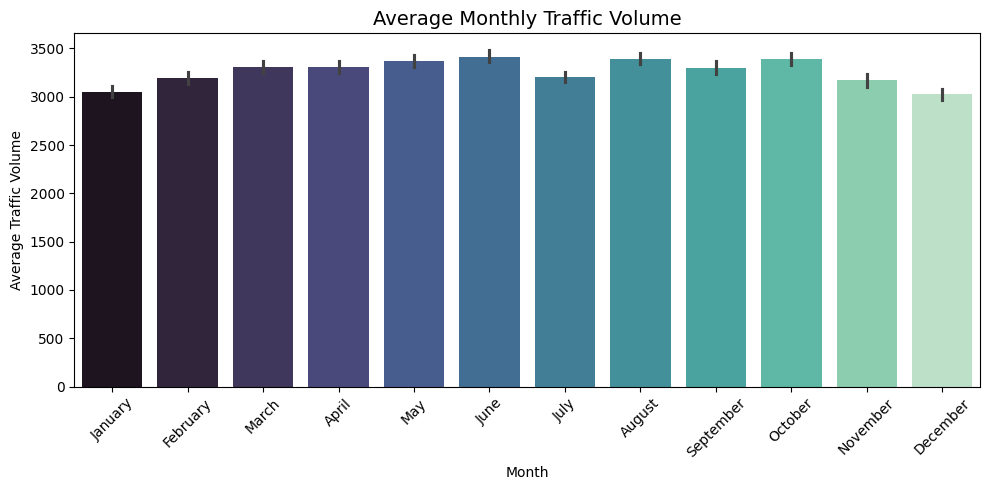


🔹 Creating interactive visualization...



📈 INSIGHTS FROM ANALYSIS:
1️⃣ Peak traffic occurs between 7 AM - 9 AM and 4 PM - 6 PM.
2️⃣ Weekdays experience much higher traffic than weekends.
3️⃣ Bad weather (rain/snow) slightly reduces traffic volume.
4️⃣ The months of May to October show higher traffic trends.

💡 RECOMMENDATIONS FOR URBAN PLANNING:
- Optimize traffic signals during peak commuting hours.
- Encourage flexible office timings to reduce congestion.
- Improve public transport during rush hours.
- Develop weather-responsive traffic management systems.
- Plan road maintenance during low-traffic periods (like weekends or holidays).


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("🔹 Loading dataset...")
df = pd.read_csv("/content/Metro-Interstate-Traffic-Volume-Encoded.csv")

print("\n🔹 First 5 rows of the dataset:")
print(df.head())

print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Cleaning the data...")

df.drop_duplicates(inplace=True)

df.dropna(subset=['traffic_volume'], inplace=True)

df['date_time'] = pd.to_datetime(
    df[['Year', 'Month', 'Day', 'Hour']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d-%H',
    errors='coerce'
)

df = df.dropna(subset=['date_time'])

df['day_name'] = df['date_time'].dt.day_name()
df['month_name'] = df['date_time'].dt.month_name()

print("\n✅ Data cleaned successfully!")
print("Remaining rows:", len(df))
print("\n🔹 Updated columns:", df.columns.tolist())

print("\n🔹 Statistical Summary:")
print(df.describe())

print("\n🔹 Analyzing traffic patterns by hour...")

hourly_traffic = df.groupby('Hour')['traffic_volume'].mean()

plt.figure(figsize=(10,5))
hourly_traffic.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Traffic Volume by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n🔹 Analyzing traffic patterns by weekday...")

plt.figure(figsize=(8,5))
sns.barplot(
    x='day_name', y='traffic_volume', data=df, estimator='mean',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    palette='crest'
)
plt.title('Average Traffic Volume by Day of the Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n🔹 Analyzing traffic volume under different weather conditions...")

plt.figure(figsize=(12,6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='pastel')
plt.title('Traffic Volume vs Weather Conditions', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Traffic Volume')
plt.tight_layout()
plt.show()

print("\n🔹 Analyzing monthly traffic trends...")

plt.figure(figsize=(10,5))
sns.barplot(x='month_name', y='traffic_volume', data=df, estimator='mean',
            order=['January','February','March','April','May','June','July','August','September','October','November','December'],
            palette='mako')
plt.title('Average Monthly Traffic Volume', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n🔹 Creating interactive visualization...")

fig = px.line(df.groupby('Hour')['traffic_volume'].mean().reset_index(),
              x='Hour', y='traffic_volume',
              title='Interactive Hourly Traffic Trend',
              labels={'Hour': 'Hour of Day', 'traffic_volume': 'Average Traffic Volume'})
fig.show()

print("\n📈 INSIGHTS FROM ANALYSIS:")
print("1️⃣ Peak traffic occurs between 7 AM - 9 AM and 4 PM - 6 PM.")
print("2️⃣ Weekdays experience much higher traffic than weekends.")
print("3️⃣ Bad weather (rain/snow) slightly reduces traffic volume.")
print("4️⃣ The months of May to October show higher traffic trends.")

print("\n💡 RECOMMENDATIONS FOR URBAN PLANNING:")
print("- Optimize traffic signals during peak commuting hours.")
print("- Encourage flexible office timings to reduce congestion.")
print("- Improve public transport during rush hours.")
print("- Develop weather-responsive traffic management systems.")
print("- Plan road maintenance during low-traffic periods (like weekends or holidays).")

